In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures'

import flotilla
study = flotilla.embark('singlecell_pnm_figure4_voyages', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-10-27 13:59:35	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-10-27 13:59:35	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-10-27 14:00:04 	Initializing Study
2016-10-27 14:00:04 	Initializing Predictor configuration manager for Study
2016-10-27 14:00:04	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-10-27 14:00:04	Added ExtraTreesClassifier to default predictors
2016-10-27 14:00:04	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-10-27 14:00:04	Added ExtraTreesRegressor to default predictors
2016-10-27 14:00:04	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-10-27 14:00:04	Added GradientBoostingClassifier to defa

Error loading species hg19 data: HTTP Error 404: Not Found

In [3]:
figure_folder = 'figures/005_dig_into_mature_mns'
! mkdir -p $figure_folder

The motiviation for this is that bimodal MNs have three big outlier cell groups

In [4]:
bimodal = study.supplemental.modalities_tidy.query('modality == "bimodal"')
print(bimodal.shape)
bimodal.head()

(7079, 3)


,phenotype,event_id,modality
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,bimodal
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:10...,bimodal
6,MN,exon:chr10:103113864-103113985:+@exon:chr10:10...,bimodal
10,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal
12,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal


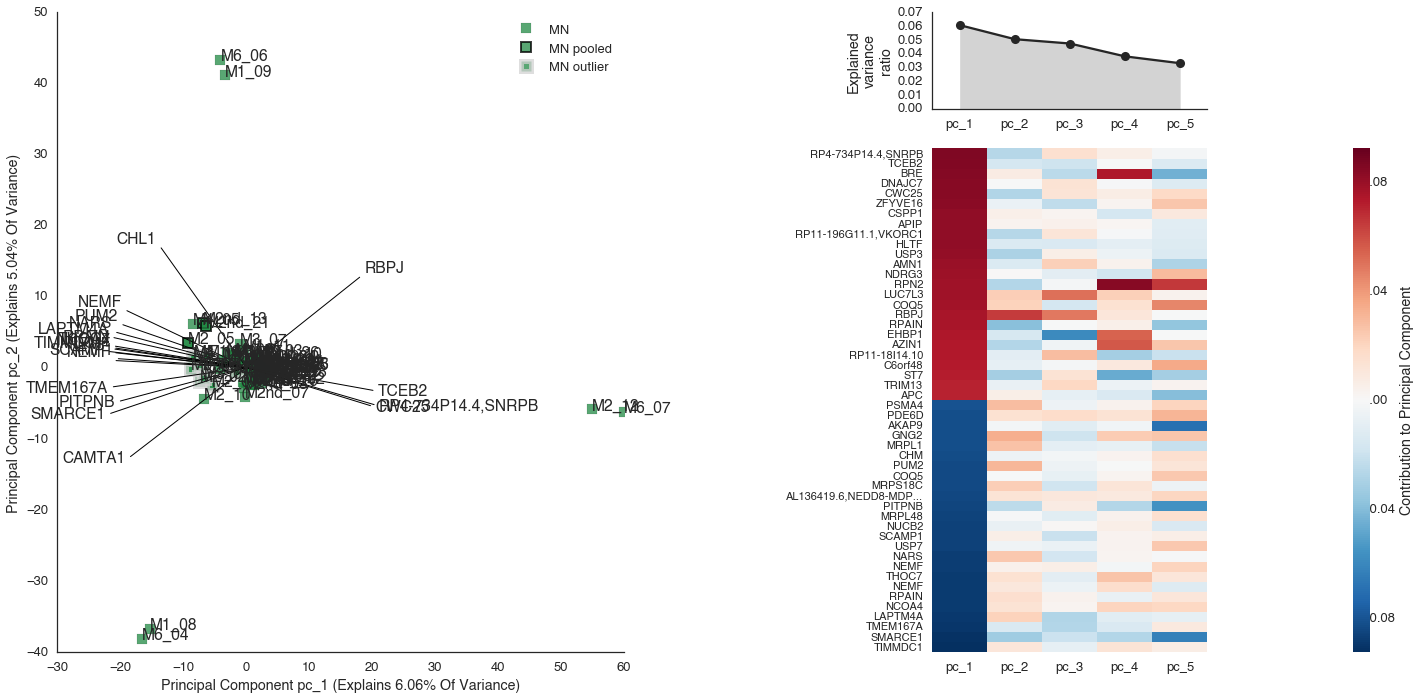

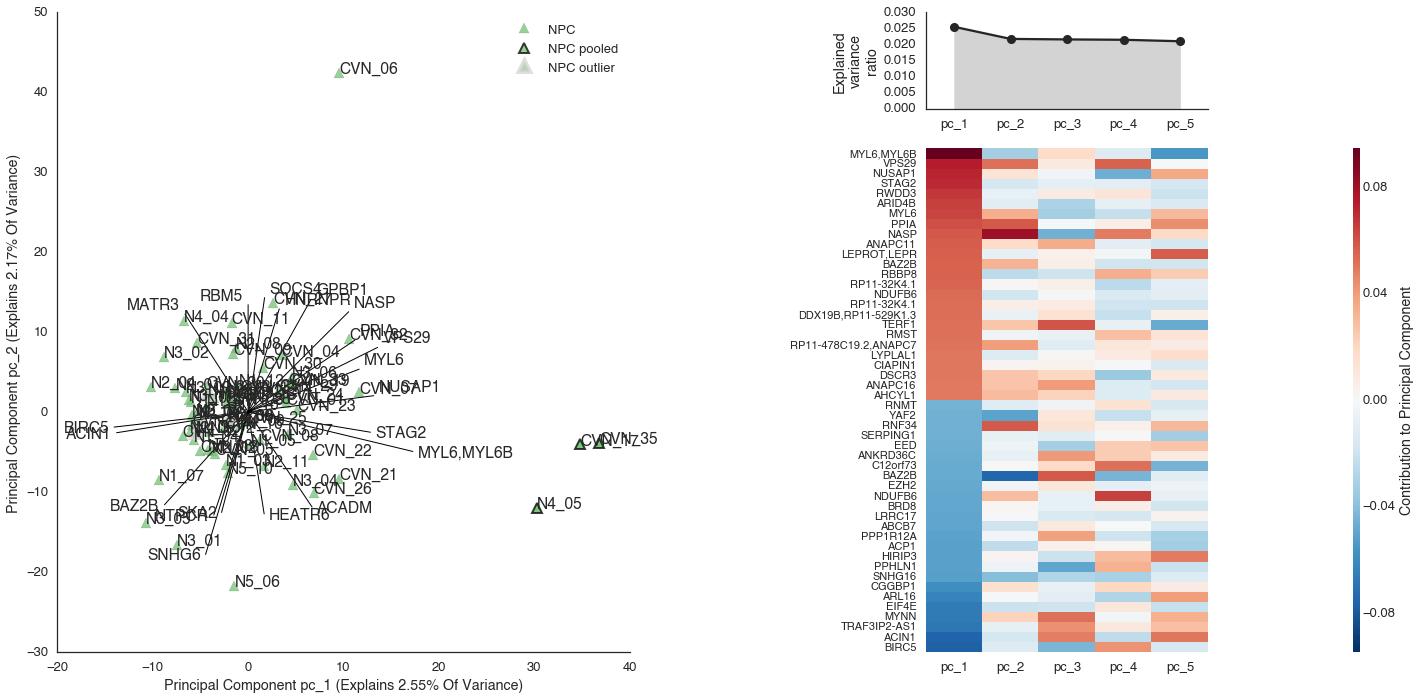

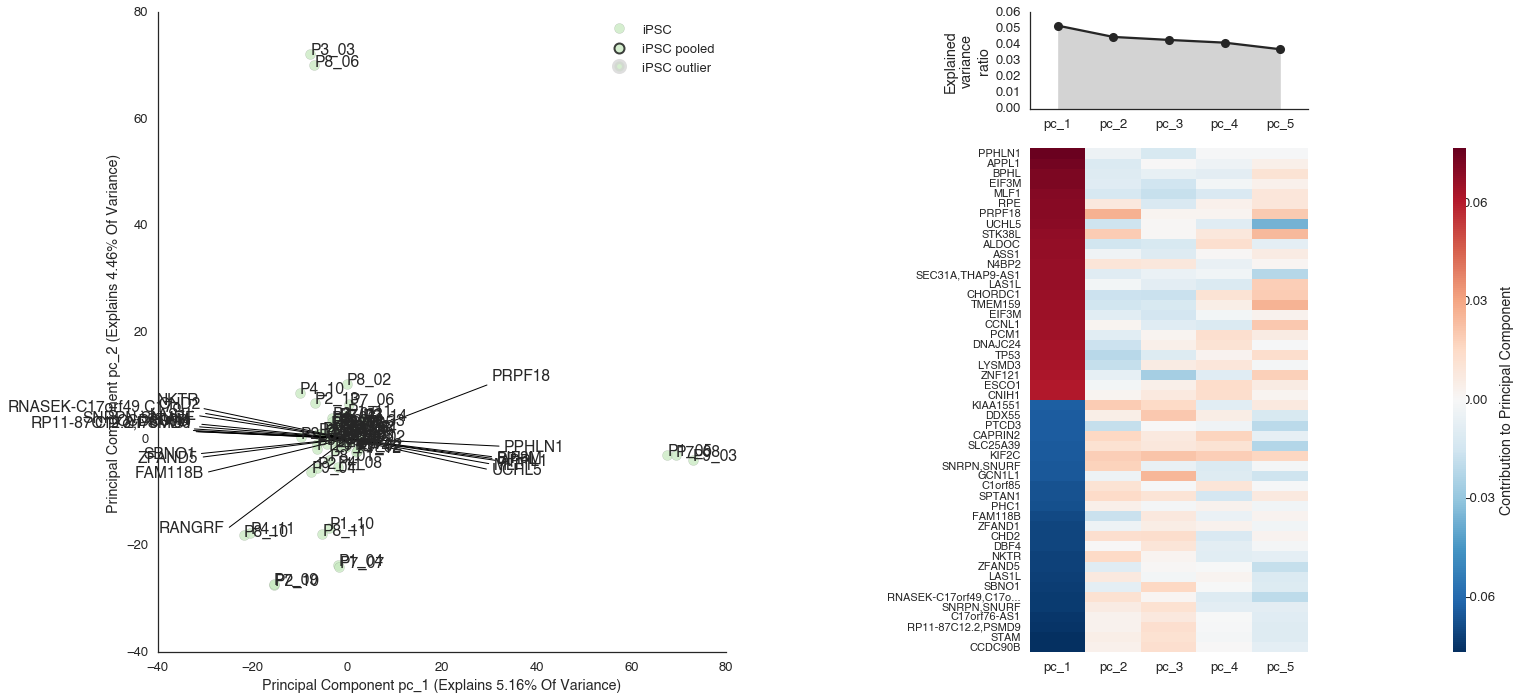

In [5]:
for phenotype, df in bimodal.groupby('phenotype'):
    pcaviz = study.plot_pca(data_type='splicing', feature_subset=df['event_id'], 
                            sample_subset=phenotype, show_point_labels=True)
    fig = plt.gcf()
    fig.savefig('{}/pca_bimodal_events_{}_labeled.pdf'.format(figure_folder, phenotype))

In [6]:
interesting_cells = {'group1': ['M2_12', 'M6_07'],
                     'group2': ['M1_08', 'M6_04'],
                     'group3': ['M1_09', 'M6_06']}

In [25]:
interesting_cells = dict(('+'.join(cells), cells) for k, cells in interesting_cells.items())
interesting_cells

{'M1_08+M6_04': ['M1_08', 'M6_04'],
 'M1_09+M6_06': ['M1_09', 'M6_06'],
 'M2_12+M6_07': ['M2_12', 'M6_07']}

In [97]:
interesting_cells_individual = list(itertools.chain(*interesting_cells.values()))
interesting_cells_individual

['M2_12', 'M6_07', 'M1_09', 'M6_06', 'M1_08', 'M6_04']

In [26]:
single_motor_neurons = study.sample_subset_to_sample_ids('single') \
    & study.sample_subset_to_sample_ids('MN') \
    & study.sample_subset_to_sample_ids('~outlier')
print(len(single_motor_neurons))
single_motor_neurons

60


Index([u'M1_01', u'M1_02', u'M1_05', u'M1_06', u'M1_07', u'M1_08', u'M1_09',
       u'M1_10', u'M1_11', u'M1_12', u'M2_03', u'M2_04', u'M2_08', u'M2_09',
       u'M2_10', u'M2_11', u'M2_12', u'M2nd_01', u'M2nd_02', u'M2nd_03',
       u'M2nd_04', u'M2nd_05', u'M2nd_06', u'M2nd_07', u'M2nd_08', u'M2nd_09',
       u'M2nd_10', u'M2nd_11', u'M2nd_12', u'M2nd_14', u'M2nd_15', u'M2nd_16',
       u'M2nd_17', u'M2nd_18', u'M2nd_19', u'M2nd_20', u'M2nd_22', u'M2nd_24',
       u'M2nd_25', u'M2nd_26', u'M2nd_27', u'M2nd_28', u'M2nd_29', u'M3_02',
       u'M3_07', u'M3_14', u'M4_05', u'M4_06', u'M4_11', u'M4_12', u'M4_14',
       u'M5_01', u'M5_02', u'M5_03', u'M5_04', u'M6_03', u'M6_04', u'M6_05',
       u'M6_06', u'M6_07'],
      dtype='object')

In [27]:
import itertools

remaining_motor_neurons = single_motor_neurons.difference(itertools.chain(*interesting_cells.values()))
print(len(remaining_motor_neurons))
remaining_motor_neurons

54


Index([u'M1_01', u'M1_02', u'M1_05', u'M1_06', u'M1_07', u'M1_10', u'M1_11',
       u'M1_12', u'M2_03', u'M2_04', u'M2_08', u'M2_09', u'M2_10', u'M2_11',
       u'M2nd_01', u'M2nd_02', u'M2nd_03', u'M2nd_04', u'M2nd_05', u'M2nd_06',
       u'M2nd_07', u'M2nd_08', u'M2nd_09', u'M2nd_10', u'M2nd_11', u'M2nd_12',
       u'M2nd_14', u'M2nd_15', u'M2nd_16', u'M2nd_17', u'M2nd_18', u'M2nd_19',
       u'M2nd_20', u'M2nd_22', u'M2nd_24', u'M2nd_25', u'M2nd_26', u'M2nd_27',
       u'M2nd_28', u'M2nd_29', u'M3_02', u'M3_07', u'M3_14', u'M4_05',
       u'M4_06', u'M4_11', u'M4_12', u'M4_14', u'M5_01', u'M5_02', u'M5_03',
       u'M5_04', u'M6_03', u'M6_05'],
      dtype='object')

In [28]:
from flotilla.compute.expression import differential_expression

In [29]:
mn_expression = study.expression.data.loc[remaining_motor_neurons]
print(mn_expression.shape)
mn_expression.head()

(54, 18594)


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
M1_01,0.000000,0,0.000000,0.476305,0.000000,0.000000,4.086611,0.000000,0,6.805999,...,1.033579,0.000000,1.617492,0.443870,0.000000,0.154009,3.953973,0.00000,0.311817,0.082292
M1_02,6.507290,0,0.301184,2.747011,0.828363,1.171047,2.274019,6.534786,0,1.697779,...,3.010307,0.000000,1.984850,1.118778,1.285161,1.246718,2.112323,0.00000,1.321778,0.000000
M1_05,0.225582,0,0.000000,1.210401,0.000000,0.000000,0.000000,0.000000,0,2.950399,...,1.916381,0.000000,1.611869,0.517444,0.830031,0.409054,0.000000,0.10556,1.425287,0.000000
M1_06,5.676293,0,0.122704,4.746384,0.000000,0.133914,0.000000,0.612919,0,4.270036,...,2.157802,0.000000,0.123702,0.853597,4.496835,0.235446,3.871351,0.00000,0.322257,2.953330
M1_07,0.794991,0,0.188829,2.466424,3.883220,7.868061,0.000000,3.830127,0,7.456900,...,1.584963,6.213099,0.959246,0.886421,1.911408,0.593785,2.498522,0.16747,0.455121,1.520850


In [30]:
majority_motor_neurons = pd.Series('Majority', index=remaining_motor_neurons)

In [31]:
dfs = []

for group, cells in interesting_cells.items():
    group_data = study.expression.data.loc[cells]
    
    data = pd.concat([mn_expression, group_data])
    
    minority = pd.Series('Minority', index=cells)
    groupby = pd.concat([majority_motor_neurons, minority])
    
    result = differential_expression(data, groupby)
#     result = result.reset_index()
    result['group'] = group
    dfs.append(result)
de_result = pd.concat(dfs)

In [37]:
de_result.to_csv('{}/differential_expression_groups.csv'.format(figure_folder), index=False)

In [81]:
p_value = 0.001

In [82]:
de_result_significant = de_result.query('bonferonni_p_value < @p_value')
print(de_result_significant.shape)
de_result_significant.groupby('group').size()

(111, 5)


group
M1_08+M6_04    32
M1_09+M6_06    35
M2_12+M6_07    44
dtype: int64

In [83]:
de_result_significant_symbols = de_result_significant.join(study.expression.feature_data['gene_name'], on='gene_id')
print(de_result_significant_symbols.shape)
de_result_significant_symbols.head()

(111, 6)


,gene_id,U_statistic,p_value,bonferonni_p_value,group,gene_name
0,ENSG00000136383,0,1.018726e-13,1.894220e-09,M2_12+M6_07,ALPK3
1,ENSG00000264672,0,1.018726e-13,1.894220e-09,M2_12+M6_07,RP11-112H10.4
2,ENSG00000130377,0,1.018726e-13,1.894220e-09,M2_12+M6_07,ACSBG2
3,ENSG00000243709,0,1.018726e-13,1.894220e-09,M2_12+M6_07,LEFTY1
4,ENSG00000154734,0,1.018726e-13,1.894220e-09,M2_12+M6_07,ADAMTS1


In [84]:
de_result_significant_symbols.to_csv('{}/differential_expression_groups_bonferonni{}.csv'.format(figure_folder, p_value), index=False)

In [85]:
sns.set(style='white', context='paper')

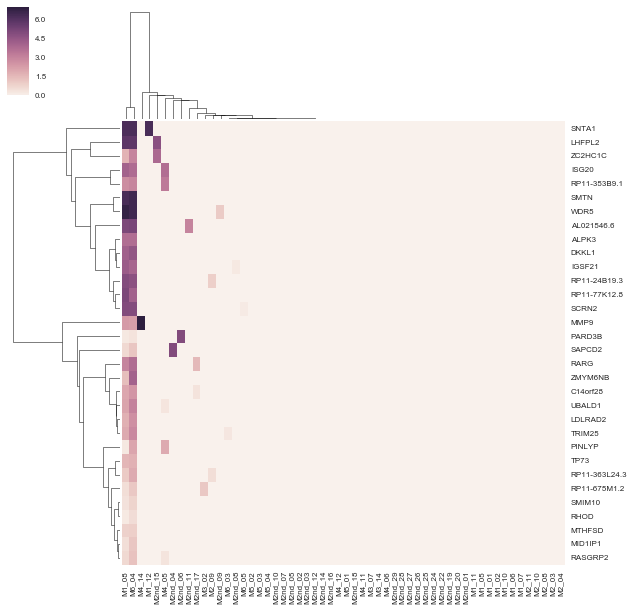

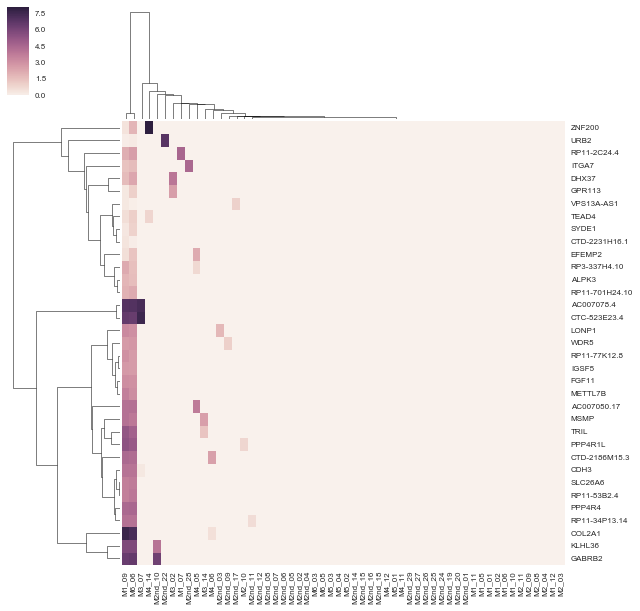

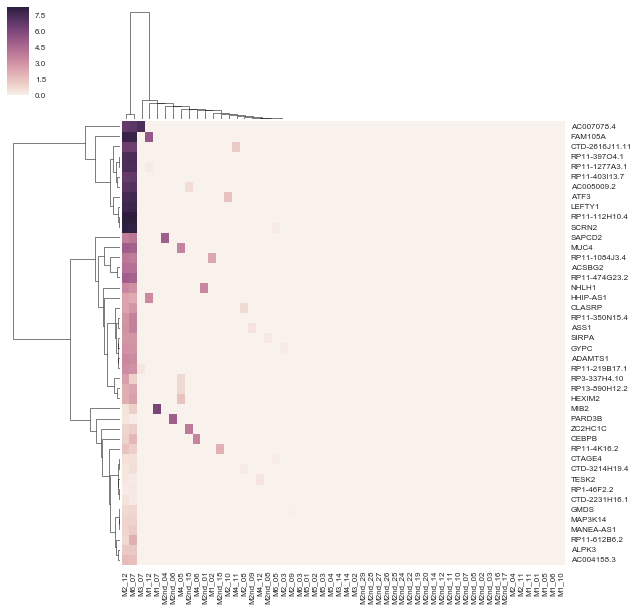

In [86]:
for group, df in de_result_significant_symbols.groupby('group'):
    samples = remaining_motor_neurons.tolist() + interesting_cells[group]
    genes = df['gene_id']
    symbols = df['gene_name']
    
    data = study.expression.data.loc[samples, genes].T
    
    g = sns.clustermap(data, method='ward', yticklabels=symbols)
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
    g.fig.savefig('{folder}/{group}_differential_genes_group_plus_core.pdf'.format(folder=figure_folder, group=group))

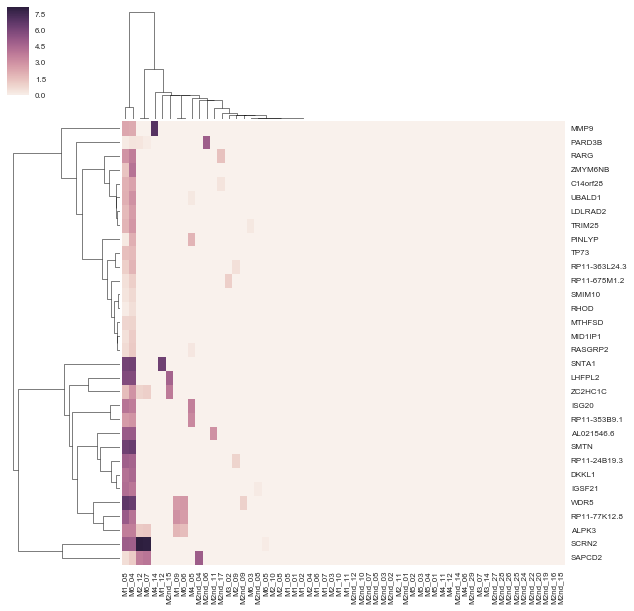

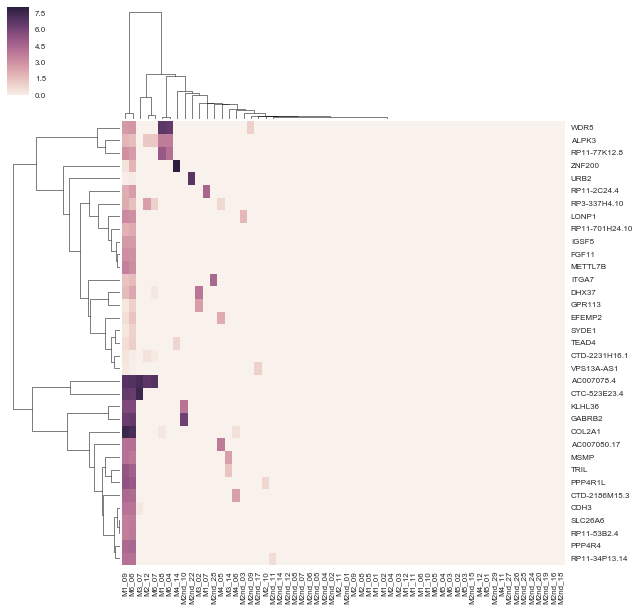

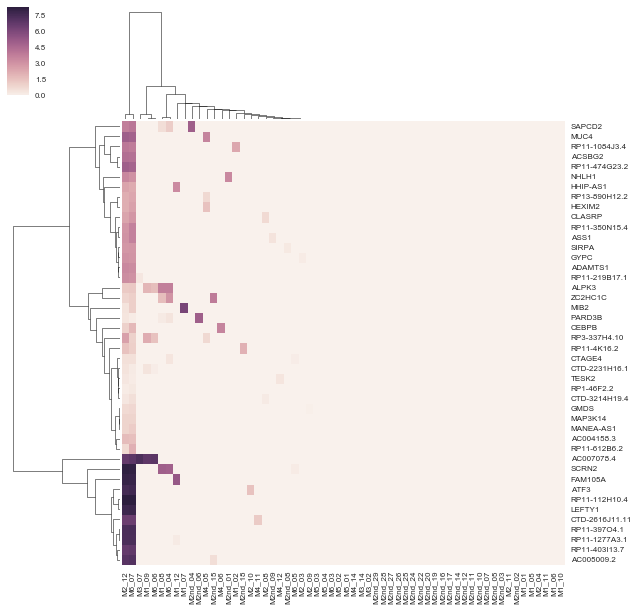

In [87]:
for group, df in de_result_significant_symbols.groupby('group'):
    samples = remaining_motor_neurons.tolist() + interesting_cells[group]
    genes = df['gene_id']
    symbols = df['gene_name']
    
    data = study.expression.data.loc[single_motor_neurons, genes].T
    
    g = sns.clustermap(data, method='ward', yticklabels=symbols)
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

    g.fig.savefig('{folder}/{group}_differential_genes_all_single_motor_neurons.pdf'.format(folder=figure_folder, group=group))

## Look at overlap

In [88]:
differential_genes = de_result_significant.groupby('group').apply(lambda x: set(x['gene_id']))
differential_genes

group
M1_08+M6_04    {ENSG00000068831, ENSG00000254705, ENSG0000015...
M1_09+M6_06    {ENSG00000124224, ENSG00000236003, ENSG0000017...
M2_12+M6_07    {ENSG00000245534, ENSG00000141295, ENSG0000024...
dtype: object

<matplotlib_venn._common.VennDiagram instance at 0x2ba24aa24f80>

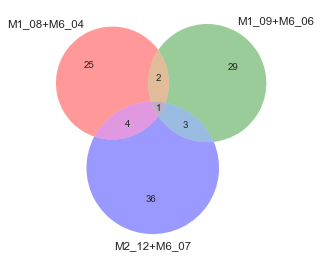

In [89]:
import matplotlib_venn

matplotlib_venn.venn3(differential_genes.values, set_labels=differential_genes.keys())

## Look only at overlapping genes

In [67]:
de_result_significant_overlapping = de_result_significant_symbols.groupby('gene_id').filter(lambda x: len(x) > 1)
print(de_result_significant_overlapping.shape)
de_result_significant_overlapping.head()

(52, 6)


,gene_id,U_statistic,p_value,bonferonni_p_value,group,gene_name
0,ENSG00000136383,0,1.018726e-13,1.894220e-09,M2_12+M6_07,ALPK3
12,ENSG00000249430,0,1.018726e-13,1.894220e-09,M2_12+M6_07,CTD-2231H16.1
20,ENSG00000271970,0,7.115417e-10,1.323041e-05,M2_12+M6_07,RP3-337H4.10
23,ENSG00000141295,0,7.115417e-10,1.323041e-05,M2_12+M6_07,SCRN2
35,ENSG00000186193,2,2.828873e-09,5.260007e-05,M2_12+M6_07,SAPCD2


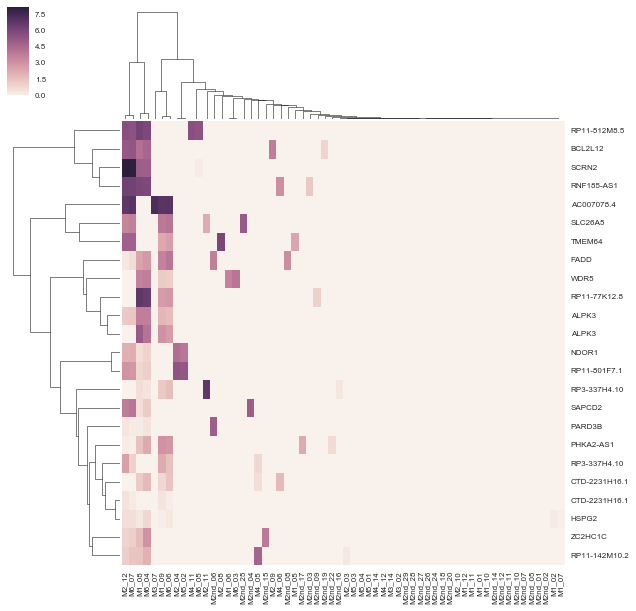

In [69]:
# for group, df in de_result_significant_overlapping.groupby('group'):
genes = de_result_significant_overlapping['gene_id'].unique()
symbols = de_result_significant_overlapping['gene_name']

data = study.expression.data.loc[single_motor_neurons, genes].T

g = sns.clustermap(data, method='ward', yticklabels=symbols)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

g.fig.savefig('{folder}/overlapping_differential_genes_all_single_motor_neurons.pdf'.format(folder=figure_folder, group=group))

## Compare with neuronal markers from cleber

In [72]:
import six

s = '''HKG	GAPDH	ADAR1	ADARB1	HIST1H1A	CDH2	PGK1	B2M	RPL22	RPL27	MeCP2
NPC	NES	PAX6	SOX1	SOX2	FABP7					
Young Neuron	NGN3	OTX1	OTX2	DCX	FOXP1	TUBB3	NGN1	NGN2	ASCL1	
Mature neuron	MAP2	RBFOX3	DLG4	KCNA1	MAPT	NEFL	SCN1A	SCN2A	SCN3A	
Sinapse	SYN1	SYP	EFNB1	SNAP25	SNAPIN	HOMER1				
Glia	S100B	GFAP	SLC1A3	OLIG2	CA2	MBP	SOX10			
N crest	B3GAT1	PAX7	POU5F1							
GABA	ABAT	GABRR1	SLC32A1	SLC6A1	GAD1	GAD2				
GLUT	SLC17A6	SLC17A7	GRIA1	GRIA2	GRIN1	GRIN2A	SLC1A1	GRIK1	GRIK2	
DOPA	TH	MAOA	DBH	DRD1	DRD2	DRD3	SLC6A3	COMT	PHOX2A	
SEROT	SLC6A4	HTR1A	HTR2A	HTR3A						
Cholinergic	ACHE	SLC18A3	SLC5A7	CHAT	CHRM1					
Purinergic	p2rx2	p2rx7	p2rx4	p2rx6	P2RY2					
Cortical	RELN	TBR1	BCL11B	CUX2	SATB2	ETV1	FOXP2	EOMES	FOXG1	'''

cleber_neuronal_markers = pd.read_table(six.StringIO(s), header=None, index_col=0)
print(cleber_neuronal_markers.shape)
cleber_neuronal_markers.head()

(14, 10)


,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
HKG,GAPDH,ADAR1,ADARB1,HIST1H1A,CDH2,PGK1,B2M,RPL22,RPL27,MeCP2
NPC,NES,PAX6,SOX1,SOX2,FABP7,NaN,NaN,NaN,NaN,NaN
Young Neuron,NGN3,OTX1,OTX2,DCX,FOXP1,TUBB3,NGN1,NGN2,ASCL1,NaN
Mature neuron,MAP2,RBFOX3,DLG4,KCNA1,MAPT,NEFL,SCN1A,SCN2A,SCN3A,NaN
Sinapse,SYN1,SYP,EFNB1,SNAP25,SNAPIN,HOMER1,NaN,NaN,NaN,NaN


In [78]:
all_markers = pd.Index([x.upper() for x in cleber_neuronal_markers.iloc[1:, :].values.flat if isinstance(x, str)])
all_markers

Index([u'NES', u'PAX6', u'SOX1', u'SOX2', u'FABP7', u'NGN3', u'OTX1', u'OTX2',
       u'DCX', u'FOXP1', u'TUBB3', u'NGN1', u'NGN2', u'ASCL1', u'MAP2',
       u'RBFOX3', u'DLG4', u'KCNA1', u'MAPT', u'NEFL', u'SCN1A', u'SCN2A',
       u'SCN3A', u'SYN1', u'SYP', u'EFNB1', u'SNAP25', u'SNAPIN', u'HOMER1',
       u'S100B', u'GFAP', u'SLC1A3', u'OLIG2', u'CA2', u'MBP', u'SOX10',
       u'B3GAT1', u'PAX7', u'POU5F1', u'ABAT', u'GABRR1', u'SLC32A1',
       u'SLC6A1', u'GAD1', u'GAD2', u'SLC17A6', u'SLC17A7', u'GRIA1', u'GRIA2',
       u'GRIN1', u'GRIN2A', u'SLC1A1', u'GRIK1', u'GRIK2', u'TH', u'MAOA',
       u'DBH', u'DRD1', u'DRD2', u'DRD3', u'SLC6A3', u'COMT', u'PHOX2A',
       u'SLC6A4', u'HTR1A', u'HTR2A', u'HTR3A', u'ACHE', u'SLC18A3', u'SLC5A7',
       u'CHAT', u'CHRM1', u'P2RX2', u'P2RX7', u'P2RX4', u'P2RX6', u'P2RY2',
       u'RELN', u'TBR1', u'BCL11B', u'CUX2', u'SATB2', u'ETV1', u'FOXP2',
       u'EOMES', u'FOXG1'],
      dtype='object')

In [79]:
de_result_significant_symbols['neuronal_marker'] = de_result_significant_symbols['gene_name'].isin(all_markers)
de_result_significant_symbols.head()

,gene_id,U_statistic,p_value,bonferonni_p_value,group,gene_name,neuronal_marker
0,ENSG00000136383,0,1.018726e-13,1.894220e-09,M2_12+M6_07,ALPK3,False
1,ENSG00000264672,0,1.018726e-13,1.894220e-09,M2_12+M6_07,RP11-112H10.4,False
2,ENSG00000130377,0,1.018726e-13,1.894220e-09,M2_12+M6_07,ACSBG2,False
3,ENSG00000243709,0,1.018726e-13,1.894220e-09,M2_12+M6_07,LEFTY1,False
4,ENSG00000154734,0,1.018726e-13,1.894220e-09,M2_12+M6_07,ADAMTS1,False


In [80]:
de_result_significant_symbols.query('neuronal_marker == "True"')

,gene_id,U_statistic,p_value,bonferonni_p_value,group,gene_name,neuronal_marker


## MN markers from Florian

In [113]:
mn_markers_symbols = ['ISL1', 'ISL2', 'MNX1', 'FOXP1', 'CHAT', 'TUBB3', 'GFAP', 'NES', 'PAX6']
mn_markers_ids = list(itertools.chain(*[study.expression.maybe_renamed_to_feature_id(x) for x in mn_markers_symbols]))
mn_markers_ids

['ENSG00000016082',
 'ENSG00000130675',
 'ENSG00000114861',
 'ENSG00000258947',
 'ENSG00000131095',
 'ENSG00000132688',
 'ENSG00000007372']

In [114]:
study.expression.feature_data.loc[mn_markers_ids, 'gene_name']

ENSG00000016082     ISL1
ENSG00000130675     MNX1
ENSG00000114861    FOXP1
ENSG00000258947    TUBB3
ENSG00000131095     GFAP
ENSG00000132688      NES
ENSG00000007372     PAX6
Name: gene_name, dtype: object

In [115]:
outliers = study.sample_subset_to_sample_ids('outlier')

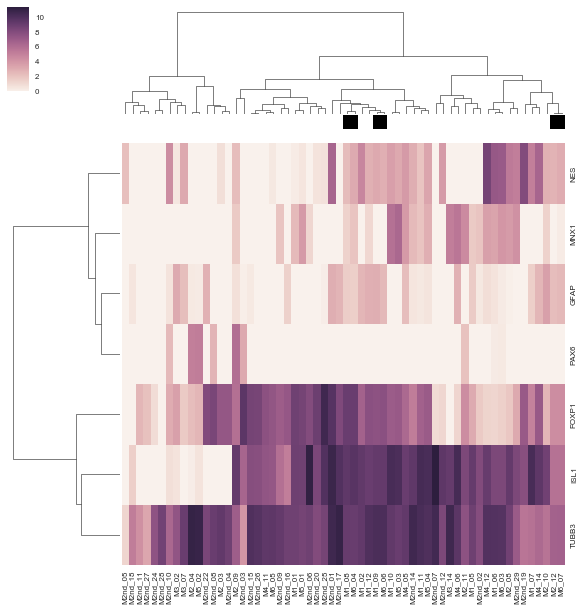

In [116]:
data = study.expression.data.loc[single_motor_neurons, mn_markers_ids].T

yticklabels = study.expression.feature_data.loc[mn_markers_ids, 'gene_name']

interesting_group_colors = ['black' if x in interesting_cells_individual else 'white' for x in data.columns]
outlier_colors = ['grey' if x in outliers else 'white' for x in data.columns]

side_colors = [interesting_group_colors, outlier_colors]

sns.clustermap(data, method='ward', yticklabels=yticklabels, col_colors=side_colors)